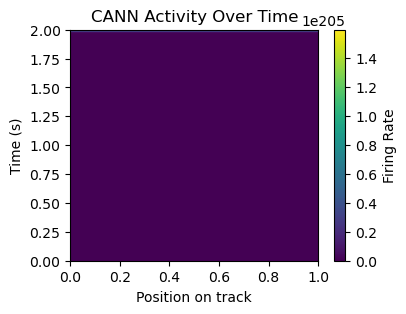

In [10]:
import numpy as np

N = 100                 # Number of neurons / positions
positions = np.linspace(0, 1, N)  # Positions from 0 to 1

J0 = 2     # Peak connection strength
sigma = 3 # Width of connectivity profile

def compute_weights(positions, J0, sigma):
    N = len(positions)
    J = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            dist = positions[i] - positions[j]
            J[i, j] = J0 * np.exp(-dist**2 / (2 * sigma**2))
    return J

J = compute_weights(positions, J0, sigma)

u = np.exp(-(positions - 0.5)**2 / (2 * 0.05**2))  # Initial bump at center

I_ext = np.zeros(N)

dt = 0.01       # Time step
T = 2           # Total time
tau = 0.2       # Membrane time constant
rho = 1.0       # Strength of recurrent input

steps = int(T/dt)
activity = np.zeros((steps, N))

for t in range(steps):
    r = np.maximum(0, u)  # Threshold-linear firing rate
    du = (-u + rho * J @ r + I_ext) * (dt / tau)
    u += du
    activity[t] = r

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.imshow(activity, aspect='auto', origin='lower',
           extent=[positions[0], positions[-1], 0, T])
plt.xlabel('Position on track')
plt.ylabel('Time (s)')
plt.title('CANN Activity Over Time')
plt.colorbar(label='Firing Rate')
plt.show()


def moving_input(positions, center, speed, t, sigma_input=0.05):
    center_pos = (center + speed * t) % 1
    return np.exp(-(positions - center_pos)**2 / (2 * sigma_input**2))

speed = 0.1  # Speed along the track (positions per second)
u = np.zeros(N)

for t_idx in range(steps):
    t_current = t_idx * dt
    I_ext = moving_input(positions, 0.2, speed, t_current)
    r = np.maximum(0, u)
    du = (-u + rho * J @ r + I_ext) * (dt / tau)
    u += du
    activity[t_idx] = r


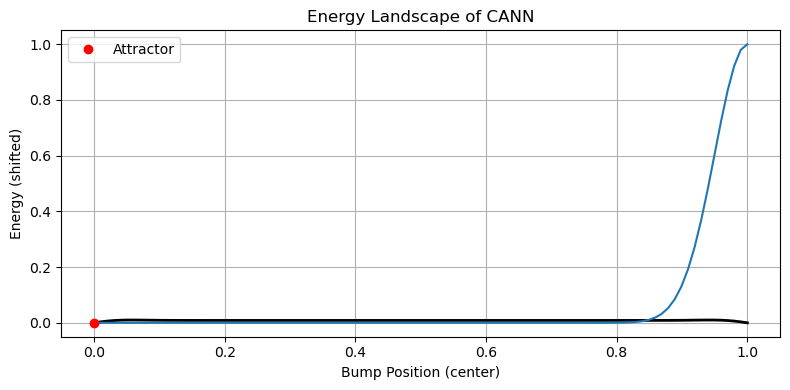

In [11]:
import numpy as np

def energy(u, J, rho, I_ext, dx):
    r = np.maximum(u, 0)  # threshold-linear activation
    interaction = - (rho / 2) * np.sum(r[:, None] * J * r[None, :]) * dx * dx
    input_term = np.sum(0.5 * u**2 - u * I_ext) * dx
    return interaction + input_term

import numpy as np
import matplotlib.pyplot as plt

N = 100
positions = np.linspace(0, 1, N)
dx = positions[1] - positions[0]

J0 = 2
sigma = 3
rho = 1.0

def compute_weights(positions, J0, sigma):
    N = len(positions)
    J = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            dist = positions[i] - positions[j]
            J[i, j] = J0 * np.exp(-dist**2 / (2 * sigma**2))
    return J

J = compute_weights(positions, J0, sigma)

def bump_profile(positions, center, width=0.05):
    return np.exp(-(positions - center)**2 / (2 * width**2))

bump_centers = positions
energies = np.zeros(N)

I_ext = np.zeros(N)  # no external input for simplicity

for idx, center in enumerate(bump_centers):
    u = bump_profile(positions, center)
    energies[idx] = energy(u, J, rho, I_ext, dx)

# Normalize energies for visualization
energies -= np.min(energies)

plt.figure(figsize=(8, 4))
plt.plot(bump_centers, energies, '-k', linewidth=2)
plt.plot(bump_centers, u)
plt.xlabel('Bump Position (center)')
plt.ylabel('Energy (shifted)')
plt.title('Energy Landscape of CANN')
plt.grid(True)

# Mark minima (attractor states)
min_idx = np.argmin(energies)
plt.plot(bump_centers[min_idx], energies[min_idx], 'ro', label='Attractor')

plt.legend()
plt.tight_layout()
plt.show()
